In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Scrape data

In [2]:
def scrape(urls: list, 
           columns: list,
           exam_year: str,
           table_offset: int, 
           tr_offset_first: int, 
           tr_offset_last: int,
           td_offset_first: int,
           td_offset_last: int):
    
    dfs = []
    
    for url in urls:
        # Make request
        response = requests.get(url)
        content = response.content.decode('utf-8')

        # Make soup 
        soup = BeautifulSoup(content, 'html.parser')

        # Get table
        table = soup.find_all('table')[table_offset]

        # Get rows
        trs = table.find_all('tr')[tr_offset_first : tr_offset_last]

        # Get values
        results = []
        for tr in trs:
            # init new dict
            result = {}

            # get value list
            tds = tr.find_all('td')[td_offset_first : td_offset_last]

            for k, td in zip(columns, tds):
                result[k] = td.text.strip()

            # append to master result
            results.append(result)

        # Convert to DataFrame
        df = pd.DataFrame(results)
        df['exam_year'] = exam_year
        dfs.append(df)
        
    df = pd.concat(dfs)
        
    return df

In [4]:
df_2018 = scrape(urls=['https://thi.tuyensinh247.com/top-100-thu-khoa-vao-lop-10-tphcm-2018-c22a39223.html'],           
                 columns = ['rank', 'code', 'last_name', 'name', 'dob', 'sub1', 'sub2', 'sub3', 'total'],
                 exam_year='2018',
                 table_offset=0, 
                 tr_offset_first=3, 
                 tr_offset_last=None,
                 td_offset_first=None,
                 td_offset_last=None)

In [5]:
df_2018.head()

,rank,code,last_name,name,dob,sub1,sub2,sub3,total,exam_year
0,1,94101,Lý Thiên,Ân,16/04/2003,8.5,10,10,28.5,2018
1,2,90020,Dương Ngọc Phương,Anh,18/07/2003,8.5,9.75,10,28.25,2018
2,3,90553,Võ Đông,Nghi,09/04/2003,8.25,10,10,28.25,2018
3,4,90556,Đinh Nguyên Bảo,Ngọc,26/03/2003,8.75,9.5,10,28.25,2018
4,5,90700,Vĩnh Bảo Uyên,Phương,14/06/2003,8.25,10,10,28.25,2018


In [6]:
df_2020 = scrape(urls=['https://thi.tuyensinh247.com/top-100-thu-khoa-vao-lop-10-tphcm-2020-c22a52579.html'],           
                 columns = ['rank', 'code', 'dob', 'sub1', 'sub2', 'sub3', 'total'],
                 exam_year='2020',
                 table_offset=0, 
                 tr_offset_first=3, 
                 tr_offset_last=None,
                 td_offset_first=None,
                 td_offset_last=None)

In [7]:
df_2020.head()

,rank,code,dob,sub1,sub2,sub3,total,exam_year
0,1,90415,26/4/2005,8.75,10,10,28.75,2020
1,2,142534,7/1/2005,8.75,10,10,28.75,2020
2,3,9047,9/10/2005,8.5,10,10,28.5,2020
3,4,90455,3/2/2005,8.5,10,10,28.5,2020
4,5,100326,26/10/2005,8.75,9.75,10,28.5,2020


# Processing

In [8]:
from datetime import datetime

def convert_date(text):
    "Customize a date convert function because some records have wrong date format"
    
    possible_formats = ['%d-%m-%y', '%d-%m-%Y', '%d/%m/%y', '%d/%m/%Y']
    
    for date_format in possible_formats:
        try:
            date_converted = datetime.strptime(text, date_format)
            print(text, date_converted)
            break
        except:
            date_converted = None
    
    return date_converted

In [9]:
dfs = [df_2018, df_2020]

In [10]:
dfs_processed = []

for df in dfs:
    
    df['dob_converted'] = df['dob'].apply(convert_date)
    
    # Clean wrong date format records
    df = df[df['dob_converted'].isnull()==False]
    
    # Get month
    df['dob_month'] = pd.DatetimeIndex(df['dob_converted']).month
    
    # Filter columns
    df = df[['dob', 'dob_month', 'exam_year']]
    
    # Append
    dfs_processed.append(df)

16/04/2003 2003-04-16 00:00:00
18/07/2003 2003-07-18 00:00:00
09/04/2003 2003-04-09 00:00:00
26/03/2003 2003-03-26 00:00:00
14/06/2003 2003-06-14 00:00:00
01/01/2003 2003-01-01 00:00:00
18/09/2003 2003-09-18 00:00:00
17/01/2003 2003-01-17 00:00:00
07/01/2003 2003-01-07 00:00:00
28/03/2003 2003-03-28 00:00:00
13/03/2003 2003-03-13 00:00:00
09/02/2003 2003-02-09 00:00:00
15/06/2003 2003-06-15 00:00:00
22/02/2003 2003-02-22 00:00:00
30/04/2003 2003-04-30 00:00:00
21/07/2003 2003-07-21 00:00:00
06/08/2003 2003-08-06 00:00:00
27/03/2003 2003-03-27 00:00:00
02/12/2003 2003-12-02 00:00:00
18/09/2003 2003-09-18 00:00:00
21/04/2003 2003-04-21 00:00:00
29/10/2003 2003-10-29 00:00:00
27/08/2003 2003-08-27 00:00:00
23/01/2003 2003-01-23 00:00:00
24/07/2003 2003-07-24 00:00:00
08/03/2003 2003-03-08 00:00:00
27/03/2003 2003-03-27 00:00:00
07/01/2003 2003-01-07 00:00:00
25/05/2003 2003-05-25 00:00:00
03/05/2003 2003-05-03 00:00:00
28/06/2003 2003-06-28 00:00:00
02/06/2003 2003-06-02 00:00:00
27/05/20

In [11]:
final = pd.concat(dfs_processed)

# Quick check

In [12]:
final.groupby('exam_year')['dob_month'].count()

exam_year
2018    100
2020    100
Name: dob_month, dtype: int64

In [14]:
df.to_csv('vn_highschool_exam.csv')

In [15]:
agg = final.groupby('dob_month')['exam_year'].count().reset_index(name='students')
agg

,dob_month,students
0,1,29
1,2,9
2,3,21
3,4,18
4,5,12
5,6,18
6,7,18
7,8,19
8,9,11
9,10,20


In [16]:
import plotly.express as px
import seaborn as sns
sns.set_style('whitegrid')

<AxesSubplot:xlabel='dob_month', ylabel='students'>

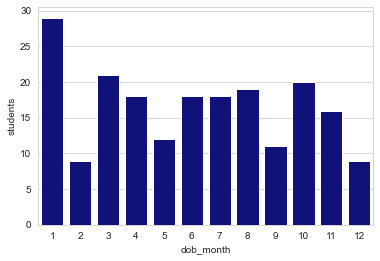

In [17]:
sns.barplot(data=agg, x='dob_month', y='students', color='DarkBlue')